In [54]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LinearRegression, LogisticRegression

#load the dataset 
df=pd.read_csv("heartdataset.csv")

#separating the features and target variable
x=df.drop('target', axis=1)
y=df['target']

In [55]:
#Feature Engineering
#Select the top 10 features based on chi-squared test
from sklearn.feature_selection import SelectKBest, chi2

x=df.drop('target', axis=1)
y=df['target']

selector=SelectKBest(chi2, k=10)
x_new=selector.fit_transform(x,y)
selected_features=x.columns[selector.get_support()]
print("Selected Features", selected_features)

Selected Features Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')


In [56]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify numerical and categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'thalach', 'oldpeak']

# Provide a transformer to transform the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Apply the transformation to the dataset
df_preprocessed = preprocessor.fit_transform(df)

# Debug: Check the shape of the transformed data
print("Shape of df_preprocessed:", df_preprocessed.shape)

# Get feature names for the one-hot encoded columns
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine numerical and categorical feature names
all_feature_names = numerical_features + list(cat_feature_names)

# Debug: Check the length of feature names
print("Number of feature names:", len(all_feature_names))

# Convert the transformed data back to a dataframe
df_transformed = pd.DataFrame(df_preprocessed, columns=all_feature_names)

# Add the target column
df_transformed['target'] = df['target'].reset_index(drop=True)

# Display the first few rows of the transformed dataframe
print(df_transformed.head())


Shape of df_preprocessed: (303, 29)
Number of feature names: 29
        age  trestbps   thalach   oldpeak  sex_0  sex_1  cp_0  cp_1  cp_2  \
0  0.952197  0.763956  0.015443  1.087338    0.0    1.0   0.0   0.0   0.0   
1 -1.915313 -0.092738  1.633471  2.122573    0.0    1.0   0.0   0.0   1.0   
2 -1.474158 -0.092738  0.977514  0.310912    1.0    0.0   0.0   1.0   0.0   
3  0.180175 -0.663867  1.239897 -0.206705    0.0    1.0   0.0   1.0   0.0   
4  0.290464 -0.663867  0.583939 -0.379244    1.0    0.0   1.0   0.0   0.0   

   cp_3  ...  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  thal_3  \
0   1.0  ...   1.0   0.0   0.0   0.0   0.0     0.0     1.0     0.0     0.0   
1   0.0  ...   1.0   0.0   0.0   0.0   0.0     0.0     0.0     1.0     0.0   
2   0.0  ...   1.0   0.0   0.0   0.0   0.0     0.0     0.0     1.0     0.0   
3   0.0  ...   1.0   0.0   0.0   0.0   0.0     0.0     0.0     1.0     0.0   
4   0.0  ...   1.0   0.0   0.0   0.0   0.0     0.0     0.0     1.0     0.0   

   t

In [58]:
#method 2
# Check the shape of the transformed data
print(df_preprocessed.shape)

# Get the feature names from the one-hot encoder
categorical_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out())
print(len(categorical_feature_names))
print(categorical_feature_names)


(303, 29)
25
['sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3']


In [59]:
#Print the shape of the transformed data:
print("Shape of df_preprocessed:", df_preprocessed.shape)


Shape of df_preprocessed: (303, 29)


In [60]:
#Get the feature names from the one-hot encoder and print them:
categorical_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out())
print("Number of categorical feature names:", len(categorical_feature_names))
print("Categorical feature names:", categorical_feature_names)


Number of categorical feature names: 25
Categorical feature names: ['sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3']


In [61]:
# Convert the transformed data back to a dataframe
df_transformed = pd.DataFrame(df_preprocessed, columns=numerical_features + categorical_feature_names)
df_transformed['target'] = df['target'].reset_index(drop=True)
print(df_transformed.head())


        age  trestbps   thalach   oldpeak  sex_0  sex_1  cp_0  cp_1  cp_2  \
0  0.952197  0.763956  0.015443  1.087338    0.0    1.0   0.0   0.0   0.0   
1 -1.915313 -0.092738  1.633471  2.122573    0.0    1.0   0.0   0.0   1.0   
2 -1.474158 -0.092738  0.977514  0.310912    1.0    0.0   0.0   1.0   0.0   
3  0.180175 -0.663867  1.239897 -0.206705    0.0    1.0   0.0   1.0   0.0   
4  0.290464 -0.663867  0.583939 -0.379244    1.0    0.0   1.0   0.0   0.0   

   cp_3  ...  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  thal_3  \
0   1.0  ...   1.0   0.0   0.0   0.0   0.0     0.0     1.0     0.0     0.0   
1   0.0  ...   1.0   0.0   0.0   0.0   0.0     0.0     0.0     1.0     0.0   
2   0.0  ...   1.0   0.0   0.0   0.0   0.0     0.0     0.0     1.0     0.0   
3   0.0  ...   1.0   0.0   0.0   0.0   0.0     0.0     0.0     1.0     0.0   
4   0.0  ...   1.0   0.0   0.0   0.0   0.0     0.0     0.0     1.0     0.0   

   target  
0       1  
1       1  
2       1  
3       1  
4       

In [62]:
#data splitting is the process of diving the data into different subsets
from sklearn.model_selection import train_test_split
#using the transformed dataset
x=df_transformed.drop('target', axis=1)
y=df_transformed['target']

#splitting the dataset into the training and testing sets
x_train, y_train, x_test, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print("Training data")
print(x_train)
print(y_train)

print("Testing data")
print(x_test)
print(y_test)

#print the shape of the training and testing data
print("Training set-Features:", x_train.shape,"Target", y_train.shape)
print("Testing set-Features:", x_test.shape,"Target",y_test.shape)

Training data
          age  trestbps   thalach   oldpeak  sex_0  sex_1  cp_0  cp_1  cp_2  \
132 -1.363869 -0.663867  0.540209 -0.896862    0.0    1.0   0.0   1.0   0.0   
202  0.400752  1.049520 -1.690047 -0.206705    0.0    1.0   1.0   0.0   0.0   
196 -0.922713  1.049520 -0.115749  2.208842    0.0    1.0   0.0   0.0   1.0   
75   0.069886  0.192827  0.496478  0.310912    1.0    0.0   0.0   1.0   0.0   
176  0.621330 -0.835206  0.452748  0.310912    0.0    1.0   1.0   0.0   0.0   
..        ...       ...       ...       ...    ...    ...   ...   ...   ...   
188 -0.481558  0.478391  0.583939 -0.379244    0.0    1.0   0.0   0.0   1.0   
71  -0.371269 -2.148802  0.190365 -0.896862    0.0    1.0   0.0   0.0   1.0   
106  1.613930  1.620649 -0.815437 -0.810592    0.0    1.0   0.0   0.0   0.0   
270 -0.922713 -0.663867 -0.246940 -0.206705    0.0    1.0   1.0   0.0   0.0   
102  0.952197  0.478391  1.283627 -0.896862    1.0    0.0   0.0   1.0   0.0   

     cp_3  ...  slope_2  ca_0  ca_1  

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Using the transformed dataset
x = df_transformed.drop('target', axis=1)
y = df_transformed['target']

# Splitting the dataset into the training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the model
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)

# Make the predictions
y_predict = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error: {mse:.2f}")

#print some predictions vs actual values
print("Predicted values:", y_predict[:5])
print("Actual values:", y_test[:5].values)


Mean Squared Error: 0.12
Predicted values: [-0.06961364  0.55557237  0.47543215 -0.0814488   0.92279717]
Actual values: [0 0 1 0 1]


In [65]:
#Simulate a predicted_target column with random probabilities
np.random.seed(42)  # For reproducibility
df['predicted_target'] = np.random.rand(len(df))

# Calculate the average predicted probability of heart disease for each unique age
age_analysis = df.groupby('age')['predicted_target'].mean().reset_index()
age_analysis.columns = ['age', 'average_predicted_target']
age_analysis = age_analysis.sort_values(by='average_predicted_target', ascending=False)

# Find the age with the highest average probability
most_likely_age = age_analysis.loc[age_analysis['average_predicted_target'].idxmax()]

print("Average Predicted Probability of Heart Disease by Age")
print(age_analysis)

print("\nThe most likely age to suffer from heart disease is:")
print(most_likely_age)

# Remove the predicted_target column after analysis
data = df.drop(columns=['predicted_target'], errors='ignore')

Average Predicted Probability of Heart Disease by Age
    age  average_predicted_target
3    37                  0.911087
32   66                  0.717148
28   62                  0.686525
13   47                  0.663274
40   77                  0.645472
12   46                  0.635588
21   55                  0.596106
7    41                  0.583698
30   64                  0.578116
33   67                  0.564908
27   61                  0.552738
17   51                  0.547526
5    39                  0.531082
20   54                  0.519538
35   69                  0.518207
38   74                  0.510747
29   63                  0.504694
18   52                  0.497716
14   48                  0.495329
34   68                  0.482284
11   45                  0.478067
26   60                  0.477254
24   58                  0.473681
9    43                  0.472900
37   71                  0.471138
2    35                  0.468631
31   65                  0.4

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

x=df.drop('target', axis=1).values
y=df['target'].values

# Create logistic regression model
model=LogisticRegression(max_iter=1000)
#specify the cross validation strategy(kfolds with k=7)
Kfold=KFold(n_splits=7, shuffle=True, random_state=42)
#perform the cross validation
scores=cross_val_score(model,x,y, cv=Kfold)
#print the cross validation scores
print("Cross validation scores:", scores)
print("Mean cross validation scores:",np.mean(scores))

c:\Users\amadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross validation scores: [0.86363636 0.81818182 0.8372093  0.86046512 0.69767442 0.8372093
 0.81395349]
Mean cross validation scores: 0.818332829960737


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
#from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

x=df.drop('target', axis=1).values
y=df['target'].values

#scale the data
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

#create the Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')
#specify the cross-validation strategy(straightfiedkfold with k=7)
StratifiedKfold=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
#perform the cross-validation
scores=cross_val_score(model, x, y, cv=StratifiedKfold)
#print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation scores:", np.mean(scores))

Cross-validation scores: [0.90163934 0.85245902 0.7704918  0.81666667 0.86666667]
Mean cross-validation scores: 0.8415846994535517


In [66]:
#Training and evaluating the model
model=RandomForestClassifier()
model.fit(x_train, y_train)
y_predict=model.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_predict))

Accuracy:  0.8688524590163934


SVM Accuracy:0.8524590163934426
SVM Precision:0.896551724137931
SVM Recall:0.8125
SVM F1 score:0.8524590163934426
SVM ROC AUC:0.8545258620689655


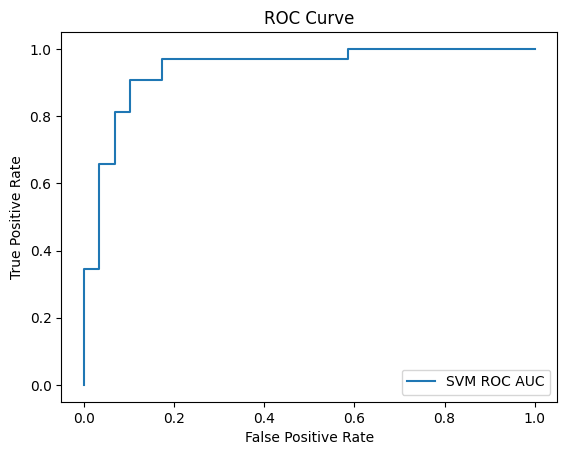

In [67]:
#Classification accuracy of Algorithms
#Initialize the models
models={
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42)
}

#Evaluate the metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision':precision_score,
    'Recall':recall_score,
    'F1 score':f1_score,
    'ROC AUC':roc_auc_score
}

#Train and evaluate the model
for model_name, model in models.items():
    model.fit(x_train, y_train)

    y_predict=model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:,1]

#calculate the Metrics
for metric_name, metric_func in metrics.items():
    metric_value=metric_func(y_test, y_predict)
    print(f'{model_name} {metric_name}: {metric_value}') 

    if metric_name == 'ROC AUC':
        fpr, tpr, _=roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label= f'{model_name} ROC AUC')

        plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Logistic Regression Performance:
Accuracy: 0.8852459016393442
Precision: 0.9032258064516129
Recall: 0.875
F1 score: 0.8888888888888888
ROC AUC: 0.9428879310344828
Decision Tree Performance:
Accuracy: 0.8032786885245902
Precision: 0.8125
Recall: 0.8125
F1 score: 0.8125
ROC AUC: 0.802801724137931
Random Forest Performance:
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1 score: 0.875
ROC AUC: 0.9224137931034482
KNN Performance:
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1 score: 0.875
ROC AUC: 0.9391163793103449
SVM Performance:
Accuracy: 0.8524590163934426
Precision: 0.896551724137931
Recall: 0.8125
F1 score: 0.8524590163934426
ROC AUC: 0.939655172413793


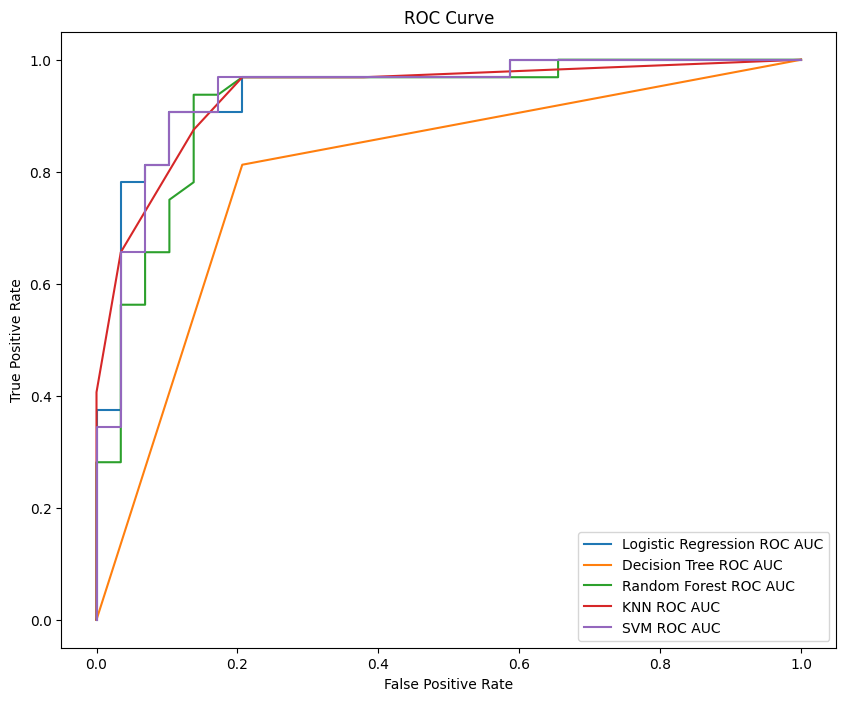

In [70]:

plt.figure(figsize=(10, 8))

# Train and evaluate the model
for model_name, model in models.items():
    model.fit(x_train, y_train)

    y_predict = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:,1]

    print(f'{model_name} Performance:')
    for metric_name, metric_func in metrics.items():
        if metric_name == 'ROC AUC':
            metric_value = metric_func(y_test, y_prob)
        else:
            metric_value = metric_func(y_test, y_predict)
        
        print(f'{metric_name}: {metric_value}')
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} ROC AUC')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Logistic Regression Performance:
Accuracy: 0.8852459016393442
Precision: 0.9032258064516129
Recall: 0.875
F1 score: 0.8888888888888888
ROC AUC: 0.9428879310344828


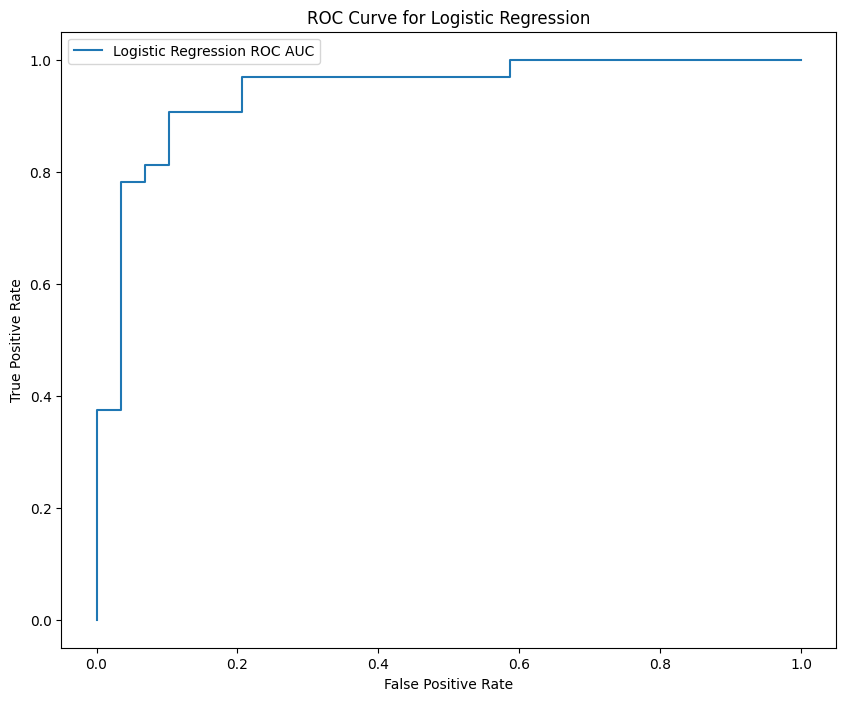

Decision Tree Performance:
Accuracy: 0.8032786885245902
Precision: 0.8125
Recall: 0.8125
F1 score: 0.8125
ROC AUC: 0.802801724137931


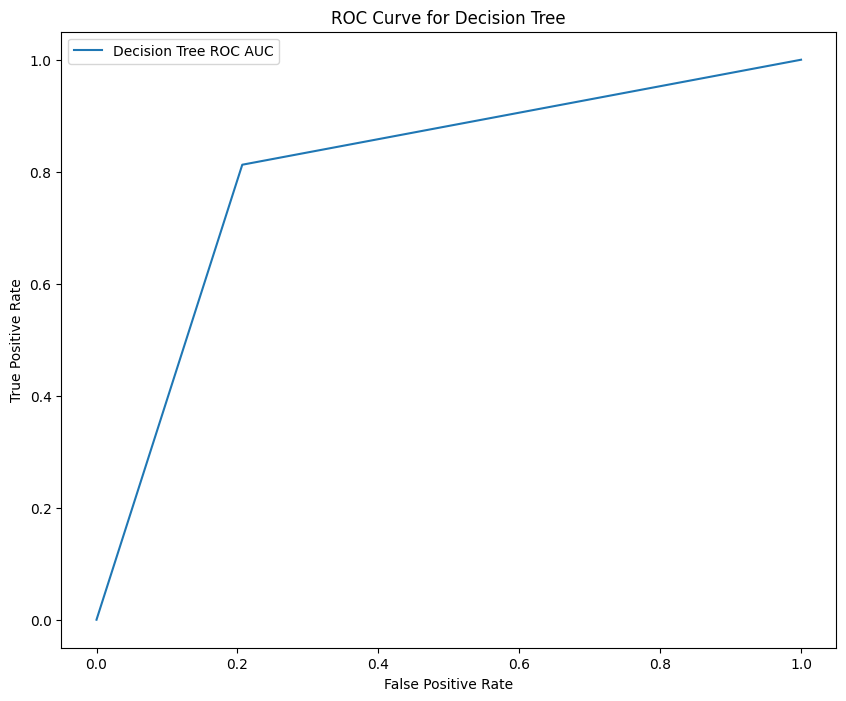

Random Forest Performance:
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1 score: 0.875
ROC AUC: 0.9224137931034482


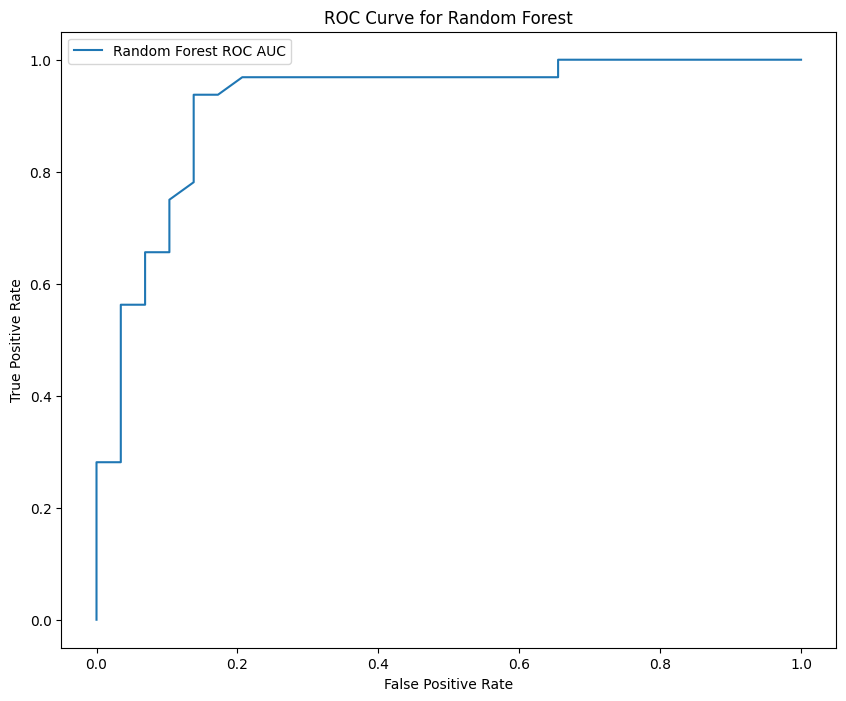

KNN Performance:
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1 score: 0.875
ROC AUC: 0.9391163793103449


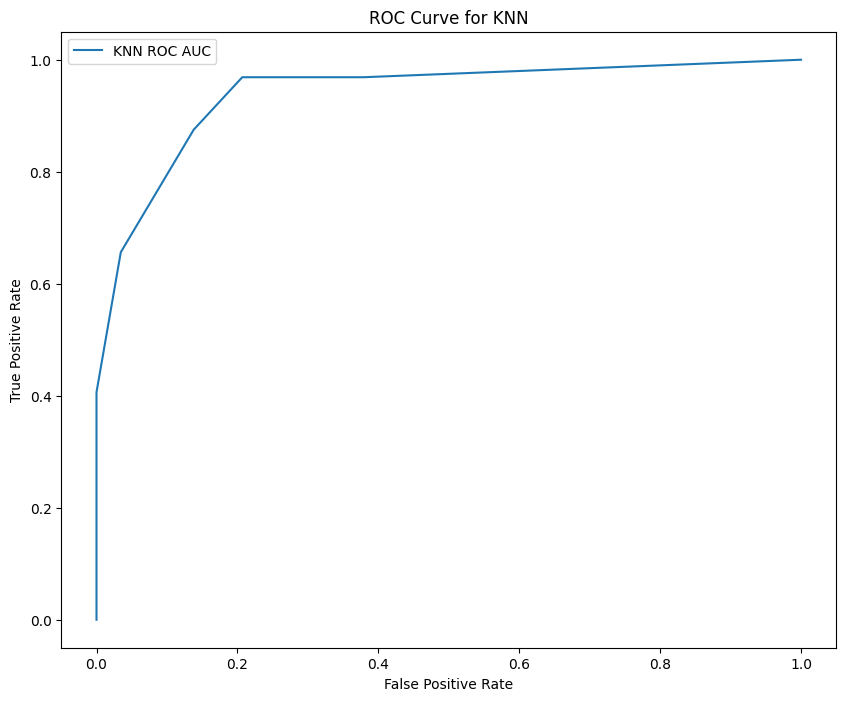

SVM Performance:
Accuracy: 0.8524590163934426
Precision: 0.896551724137931
Recall: 0.8125
F1 score: 0.8524590163934426
ROC AUC: 0.939655172413793


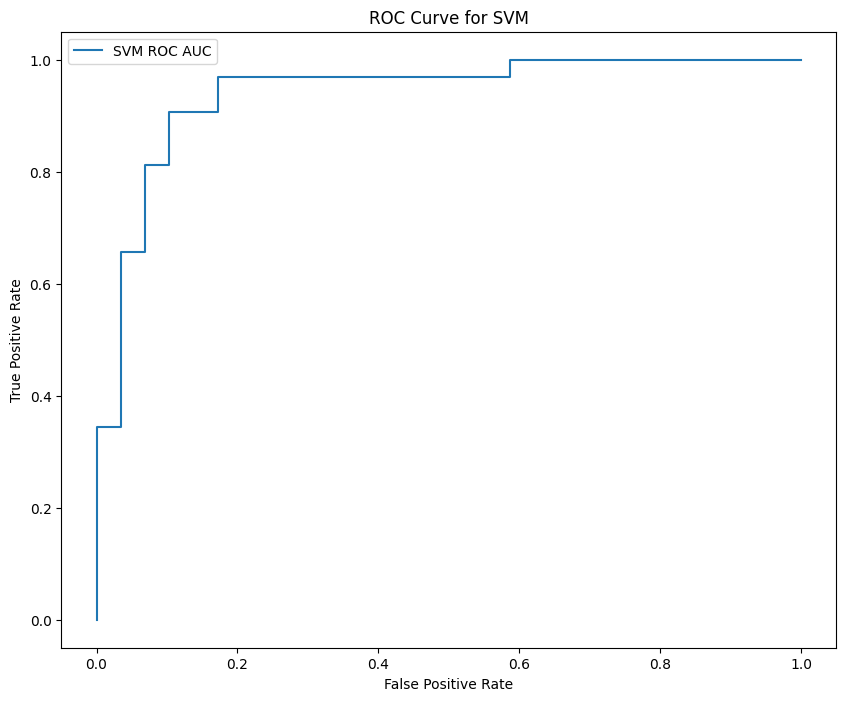

In [69]:
# Train and evaluate the model
for model_name, model in models.items():
    model.fit(x_train, y_train)

    y_predict = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:,1]

    print(f'{model_name} Performance:')
    for metric_name, metric_func in metrics.items():
        if metric_name == 'ROC AUC':
            metric_value = metric_func(y_test, y_prob)
        else:
            metric_value = metric_func(y_test, y_predict)
        
        print(f'{metric_name}: {metric_value}')
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label=f'{model_name} ROC AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend()
    plt.show()